<center><h1>~ <b>Star-Quasar-Galaxy Classification</b> ~</h1></center>
<center><h3>-- A <i><u>`Machine Learning`</u></i> Approach --</h3></center>
<center><h4>Srijan Kundu, Sruba Sarkar, Ranit Mukherjee</h4></center>
<center><h5>June 2023 - October 2023</h5></center>
<hr>

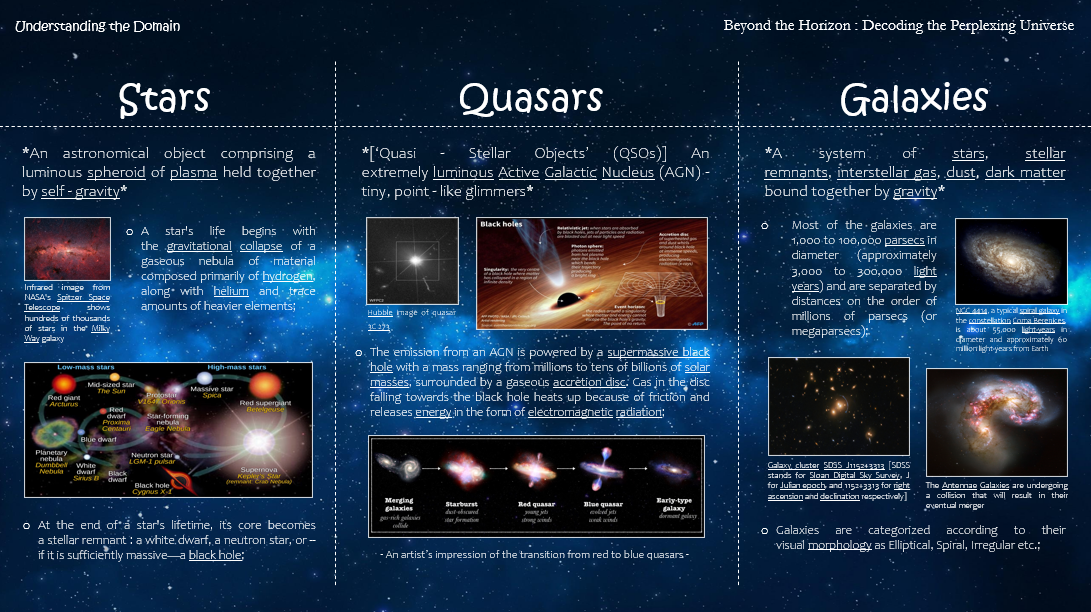

<h1>~ <b>🪐 Objective</b> ~</h1>
<hr>

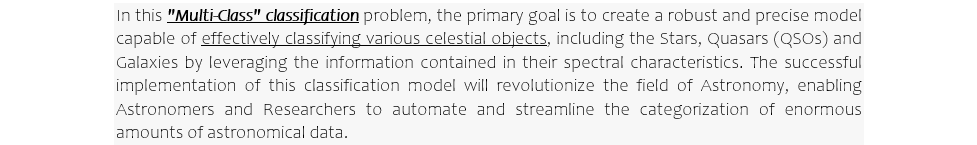

In [ ]:
# To set up and install "RAPIDS AI" libraries
!nvidia-smi
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git > /dev/null 2>&1
print("\nRepository Cloned Successfully;")
!python rapidsai-csp-utils/colab/pip-install.py > /dev/null 2>&1
print("\n\"RAPIDS AI\" libraries Installed Successfully;")

Sat Oct 14 15:12:13 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

<hr>

In [ ]:
import os
import time
# To import the library required for 'Warning Control'
import warnings; warnings.filterwarnings('ignore')

# To import the libraries required for 'Data Wrangling'
import numpy as np
import pandas as pd

# To import the libraries required for 'Data Visualization'
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To import the library required for performing 'PCA'
from sklearn.decomposition import PCA

# To import the "Rapids.AI" functions for 'GPU Acceleration'
import cudf; import cuml; import cupy

# To import the libraries required for implementing the 'ML Algorithms'
from sklearn.tree import DecisionTreeClassifier
from cuml.ensemble import RandomForestClassifier as cu_RFC
import xgboost as xgb; from xgboost import Booster
from cuml.svm import SVC as cu_SVC

# To import the libraries required for data 'Scaling, Encoding, Splitting and Hyperparameter Tuning'
from sklearn.preprocessing import StandardScaler
from cuml.preprocessing import LabelEncoder as cu_LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from cuml.model_selection import GridSearchCV as cu_GridSearchCV

# To import the libraries required for calculating the 'Evaluation Metrics'
from sklearn.metrics import classification_report, confusion_matrix
from yellowbrick.classifier import ROCAUC
from cuml.metrics import accuracy_score as cu_accuracy_score

from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [ ]:
# To load the data-set
from google.colab import drive
drive.mount('/content/drive')
data_set = pd.read_csv("/content/drive/MyDrive/SDSS_Data-Set.csv")

Mounted at /content/drive


In [ ]:
# To get the basic information
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
data_set.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237660e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237660e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237660e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237660e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543780e+18   
1  21.16812  21.61427    4518       301        5       119  1.176010e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030110e+19   
4  15.97711  15.54461    8102       301        3       137  6.891860e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427  
2  GALAXY  0.644195   4576  55592       299  
3  GALAXY  0.932346   9149  58039       775  
4  GALAXY  0.116123   6121  56187       842

<h1>~ <b>🪐 Data Description</b> ~</h1>
<hr>

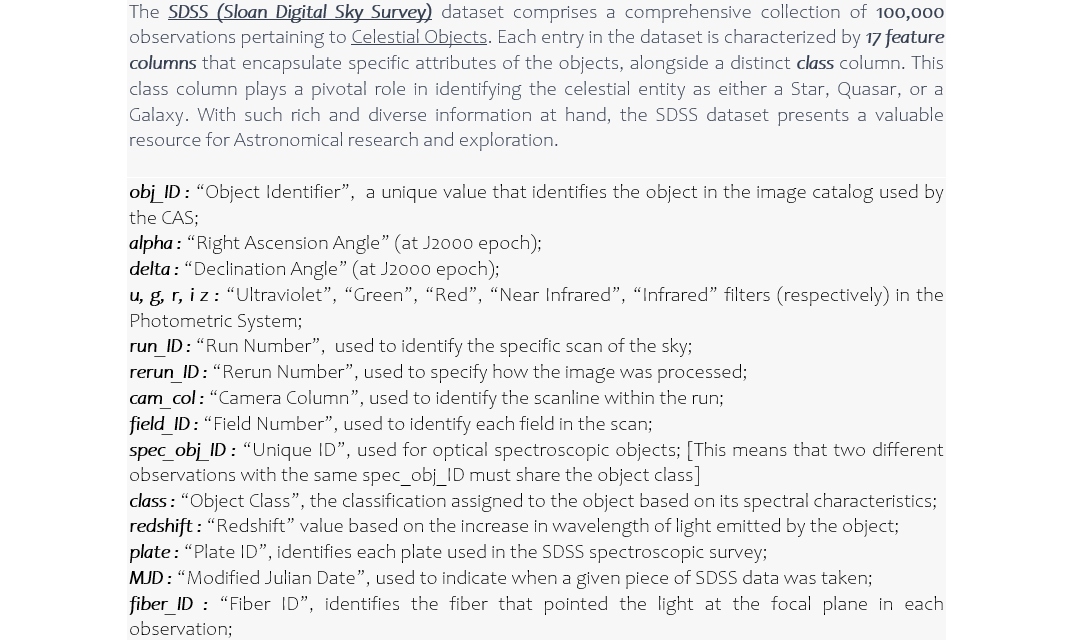

<hr>

In [ ]:
# To create a dataframe with specific columns
df = data_set.iloc[:, [1, 2, 3, 4, 5, 6, 7, 14, 13]]

# To obtain the first five observations
df.head()

alpha      delta         u         g         r         i         z  \
0  135.689107  32.494632  23.87882  22.27530  20.39501  19.16573  18.79371   
1  144.826101  31.274185  24.77759  22.83188  22.58444  21.16812  21.61427   
2  142.188790  35.582444  25.26307  22.66389  20.60976  19.34857  18.94827   
3  338.741038  -0.402828  22.13682  23.77656  21.61162  20.50454  19.25010   
4  345.282593  21.183866  19.43718  17.58028  16.49747  15.97711  15.54461   

   redshift   class  
0  0.634794  GALAXY  
1  0.779136  GALAXY  
2  0.644195  GALAXY  
3  0.932346  GALAXY  
4  0.116123  GALAXY

In [ ]:
# To obtain a statistical summary
df.describe()

alpha          delta              u              g  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean      177.629117      24.135305      21.980468      20.531387   
std        96.502241      19.644665      31.769291      31.750292   
min         0.005528     -18.785328   -9999.000000   -9999.000000   
25%       127.518222       5.146771      20.352353      18.965230   
50%       180.900700      23.645922      22.179135      21.099835   
75%       233.895005      39.901550      23.687440      22.123767   
max       359.999810      83.000519      32.781390      31.602240   

                   r              i              z       redshift  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean       19.645762      19.084854      18.668810       0.576661  
std         1.854760       1.757895      31.728152       0.730707  
min         9.822070       9.469903   -9999.000000      -0.009971  
25%        18.135828      17.732285      17.460677       0.054517  
50%        20.125290      19.405145      19.004595       0.424173  
75%        21.044785      20.396495      19.921120       0.704154  
max        29.571860      32.141470      29.383740       7.011245

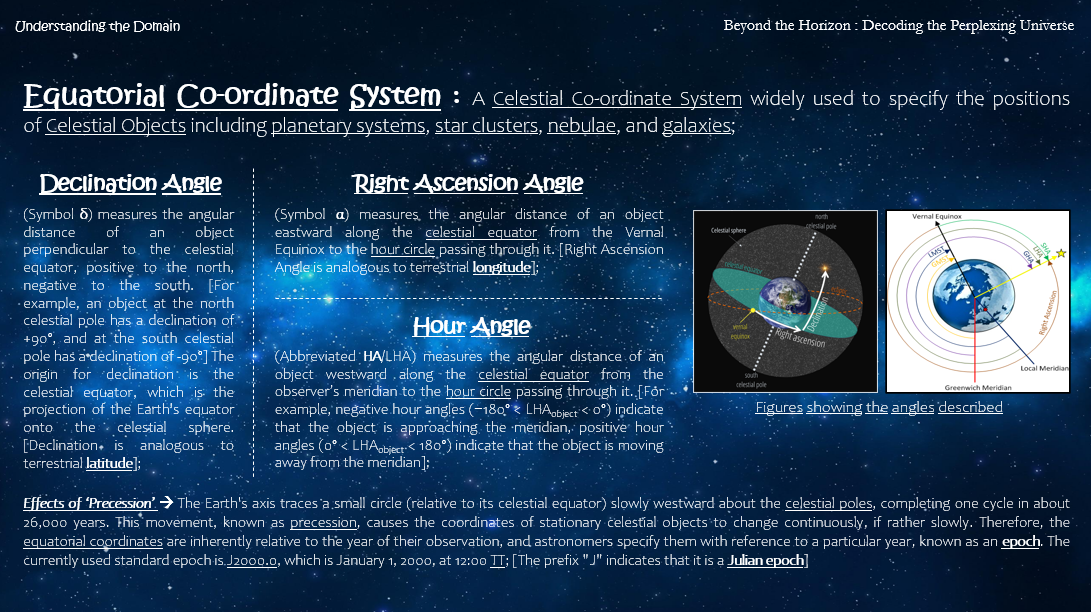

<h1>~ <b>🪐 Data Visualization</b> ~</h1>
<hr>

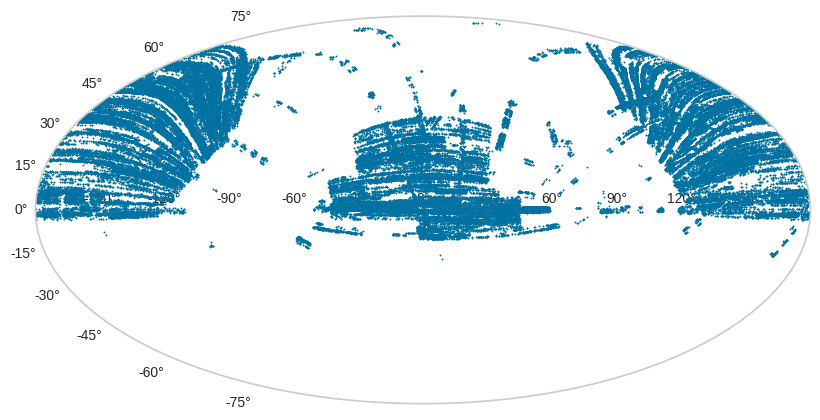

In [ ]:
# To import the libraries required for plotting 'Astronomical Co-ordinates'
from astropy.coordinates import SkyCoord
import astropy.units as u

# To observe the position of the objects on a 'Celestial Sphere'
coords = SkyCoord(ra = df['alpha']*u.degree, dec = df['delta']*u.degree, frame = 'icrs')

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = 'mollweide')
ax.scatter(coords.ra.wrap_at(180*u.degree).radian, coords.dec.radian, s = 1)
ax.grid(); plt.show()

Text(0.5, 1.0, "Proportions of each 'class'")

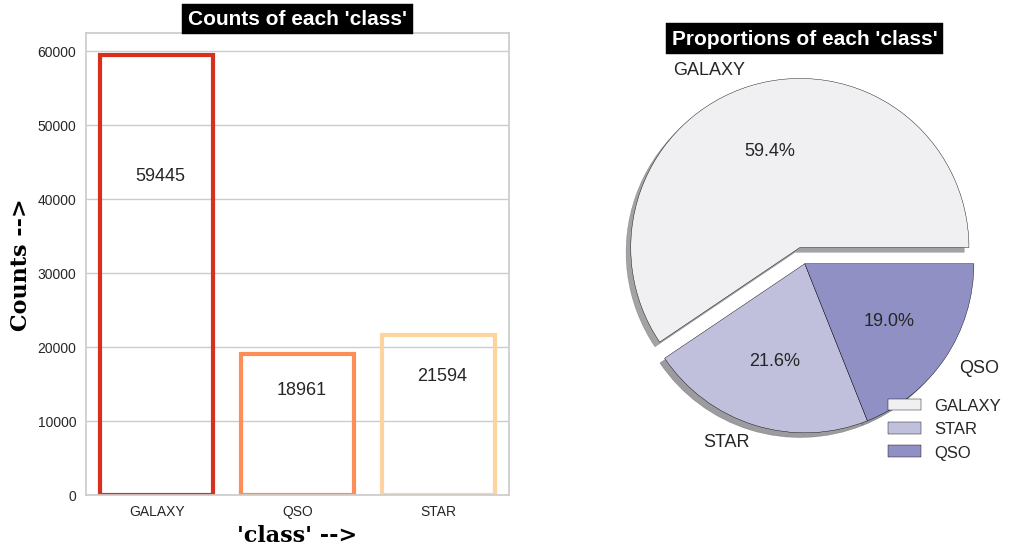

In [ ]:
# To visualize the 'class' column
plt.subplots(figsize = (12, 6))

plt.subplot(1, 2, 1)
ax = sns.countplot(data = df, x = "class", facecolor = (0, 0, 0, 0), linewidth = 3, edgecolor = sns.color_palette("OrRd_r", 3))
plt.title('Counts of each \'class\'', fontdict = {'size': 15, 'weight': 'bold', 'color': 'white', 'backgroundcolor': 'black'})
plt.xlabel('\'class\' -->', fontdict = {'family': 'serif', 'size': 16, 'weight': 'bold', 'color': 'black'})
plt.ylabel('Counts -->', fontdict = {'family': 'serif', 'size': 16, 'weight': 'bold', 'color': 'black'})

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()/1.4), fontsize = 13)

plt.subplot(1, 2, 2)
colors = sns.light_palette("navy")
explode = (0.1, 0, 0)
plt.pie(df['class'].value_counts(), autopct = "%1.1f%%", labels = ['GALAXY', 'STAR', 'QSO'], colors = colors, explode = explode, shadow = True, textprops = {'fontsize': 13}, wedgeprops = {"edgecolor" : "black"})
plt.legend(fontsize = 12, edgecolor = "black")
plt.title('Proportions of each \'class\'', fontdict = {'size': 15, 'weight': 'bold', 'color': 'white', 'backgroundcolor': 'black'})

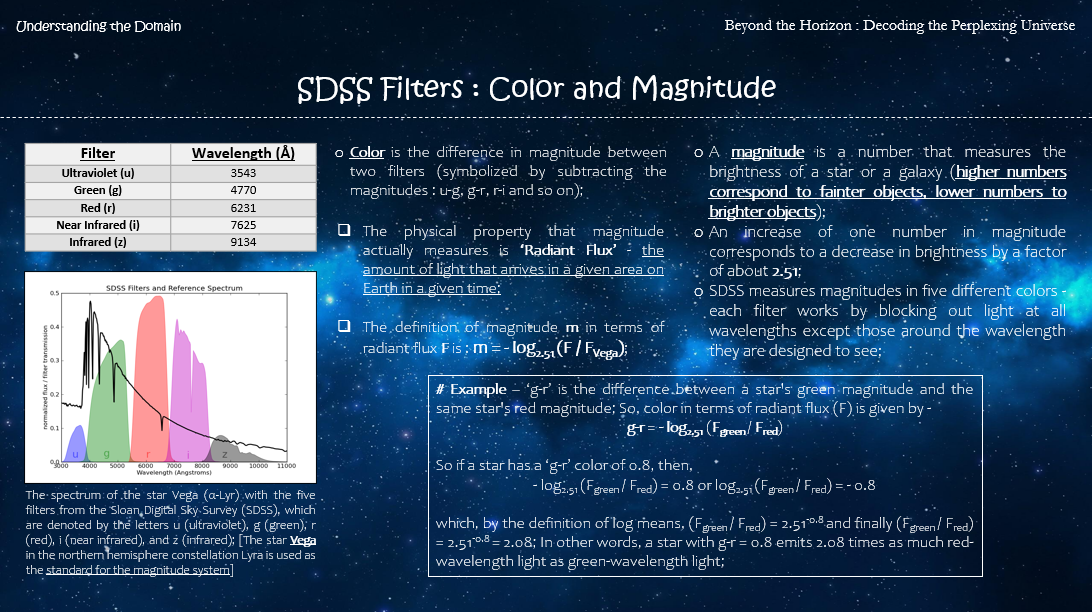

alpha     delta       u       g        r         i       z  \
79543  224.006526 -0.624304 -9999.0 -9999.0  18.1656  18.01675 -9999.0   

       redshift class  
79543  0.000089  STAR

Text(0, 0.5, "'g' -->")

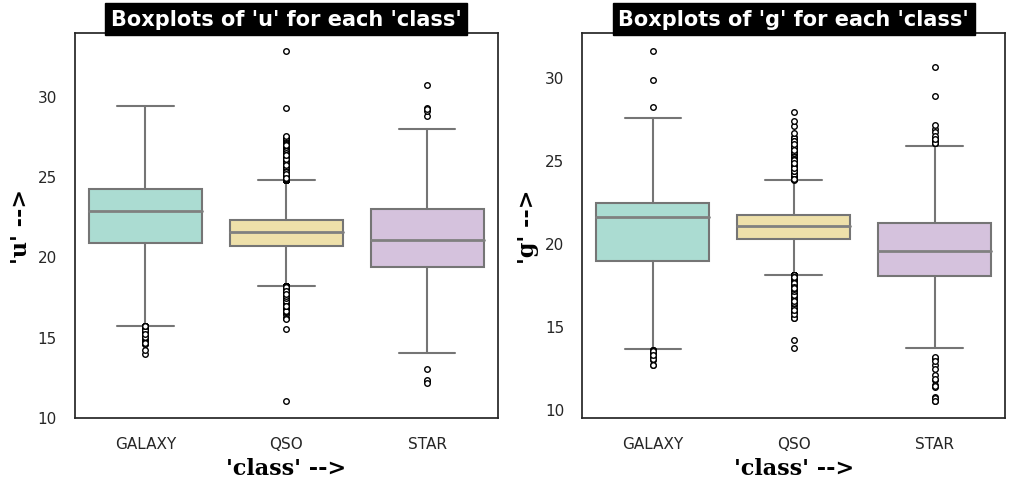

In [ ]:
## GROUPED BOX PLOTS
plt.subplots(figsize = (12, 5))
sns.set(style = "white")
my_pallete = {"GALAXY": "#A3E4D7", "QSO": "#F9E79F", "STAR":"#D7BDE2"}
medianprops = dict(linestyle = '-', linewidth = 2, color = 'grey')
flierprops = dict(marker = 'o', markerfacecolor = 'white', markersize = 4, markeredgecolor = 'black')

plt.subplot(1, 2, 1)
cols = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']
display(df[df['u'] == min(df['u'])][cols + ['class']])
df = df.drop(index = [79543])

sns.boxplot(x = "class", y = "u", data = df, palette = my_pallete, medianprops = medianprops, flierprops = flierprops)
plt.title('Boxplots of \'u\' for each \'class\'', fontdict = {'size': 15, 'weight': 'bold', 'color': 'white', 'backgroundcolor': 'black'})
plt.xlabel('\'class\' -->', fontdict = {'family': 'serif', 'size': 16, 'weight': 'bold', 'color': 'black'})
plt.ylabel('\'u\' -->', fontdict = {'family': 'serif', 'size': 16, 'weight': 'bold', 'color': 'black'})

plt.subplot(1, 2, 2)
sns.boxplot(x = "class", y = "g", data = df, palette = my_pallete, medianprops = medianprops, flierprops = flierprops)
plt.title('Boxplots of \'g\' for each \'class\'', fontdict = {'size': 15, 'weight': 'bold', 'color': 'white', 'backgroundcolor': 'black'})
plt.xlabel('\'class\' -->', fontdict = {'family': 'serif', 'size': 16, 'weight': 'bold', 'color': 'black'})
plt.ylabel('\'g\' -->', fontdict = {'family': 'serif', 'size': 16, 'weight': 'bold', 'color': 'black'})

Text(0, 0.5, "'i' -->")

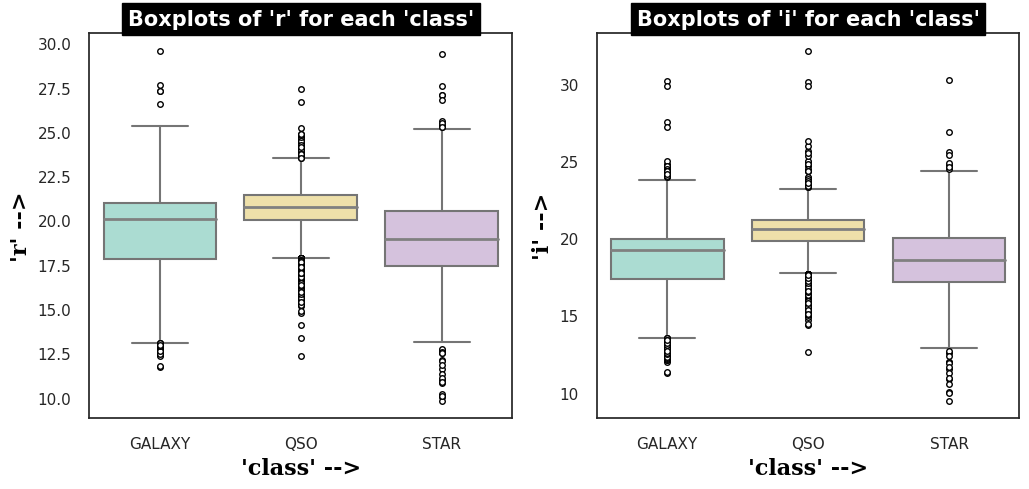

In [ ]:
## GROUPED BOX PLOTS
plt.subplots(figsize = (12, 5))
sns.set(style = "white")

plt.subplot(1, 2, 1)
sns.boxplot(x = "class", y = "r", data = df, palette = my_pallete, medianprops = medianprops, flierprops = flierprops)
plt.title('Boxplots of \'r\' for each \'class\'', fontdict = {'size': 15, 'weight': 'bold', 'color': 'white', 'backgroundcolor': 'black'})
plt.xlabel('\'class\' -->', fontdict = {'family': 'serif', 'size': 16, 'weight': 'bold', 'color': 'black'})
plt.ylabel('\'r\' -->', fontdict = {'family': 'serif', 'size': 16, 'weight': 'bold', 'color': 'black'})

plt.subplot(1, 2, 2)
sns.boxplot(x = "class", y = "i", data = df, palette = my_pallete, medianprops = medianprops, flierprops = flierprops)
plt.title('Boxplots of \'i\' for each \'class\'', fontdict = {'size': 15, 'weight': 'bold', 'color': 'white', 'backgroundcolor': 'black'})
plt.xlabel('\'class\' -->', fontdict = {'family': 'serif', 'size': 16, 'weight': 'bold', 'color': 'black'})
plt.ylabel('\'i\' -->', fontdict = {'family': 'serif', 'size': 16, 'weight': 'bold', 'color': 'black'})

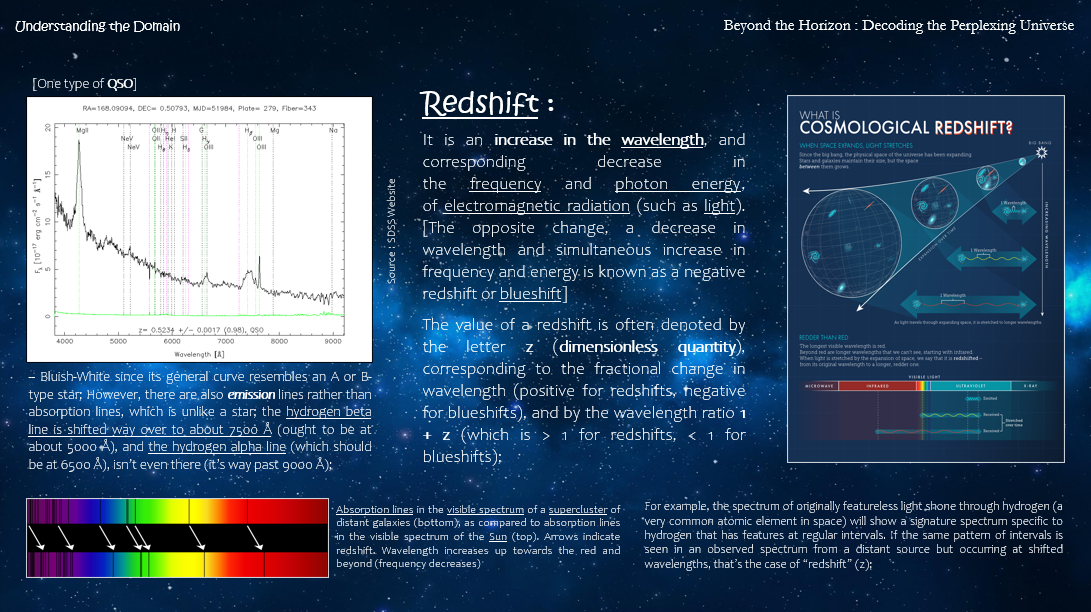

Text(0, 0.5, "'redshift' -->")

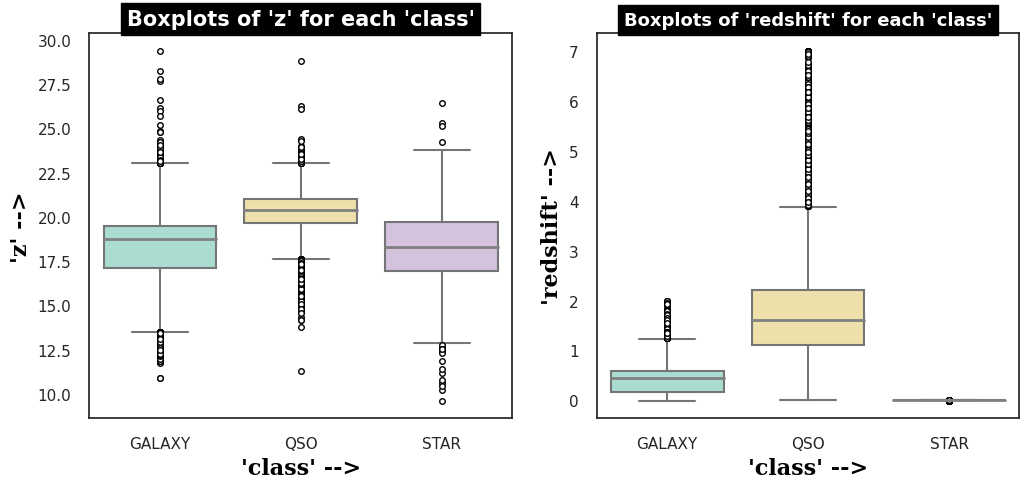

In [ ]:
## GROUPED BOX PLOTS
plt.subplots(figsize = (12, 5))
sns.set(style = "white")

plt.subplot(1, 2, 1)
sns.boxplot(x = "class", y = "z", data = df, palette = my_pallete, medianprops = medianprops, flierprops = flierprops)
plt.title('Boxplots of \'z\' for each \'class\'', fontdict = {'size': 15, 'weight': 'bold', 'color': 'white', 'backgroundcolor': 'black'})
plt.xlabel('\'class\' -->', fontdict = {'family': 'serif', 'size': 16, 'weight': 'bold', 'color': 'black'})
plt.ylabel('\'z\' -->', fontdict = {'family': 'serif', 'size': 16, 'weight': 'bold', 'color': 'black'})

plt.subplot(1, 2, 2)
sns.boxplot(x = "class", y = "redshift", data = df, palette = my_pallete, medianprops = medianprops, flierprops = flierprops)
plt.title('Boxplots of \'redshift\' for each \'class\'', fontdict = {'size': 13, 'weight': 'bold', 'color': 'white', 'backgroundcolor': 'black'})
plt.xlabel('\'class\' -->', fontdict = {'family': 'serif', 'size': 16, 'weight': 'bold', 'color': 'black'})
plt.ylabel('\'redshift\' -->', fontdict = {'family': 'serif', 'size': 16, 'weight': 'bold', 'color': 'black'})

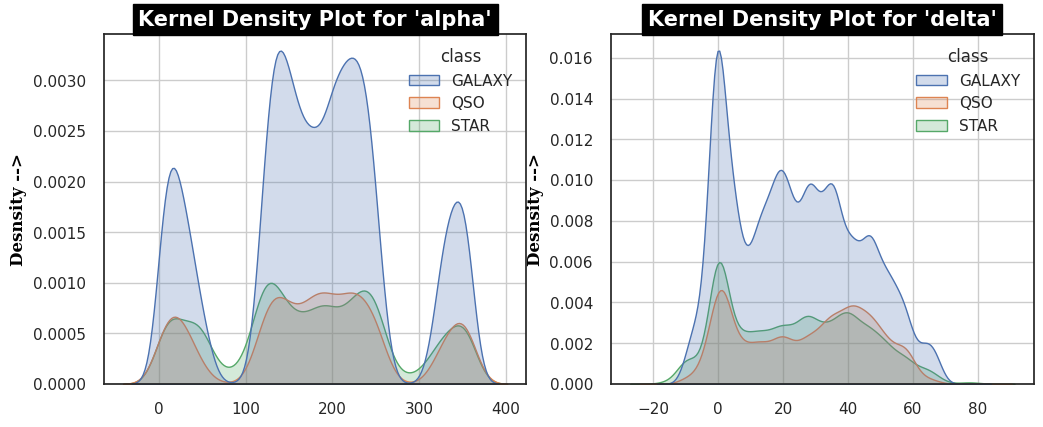

In [ ]:
## KERNEL DENSITY PLOTS
cols = ["alpha", "delta"]

def kde_plotter(df, features, target):
    plt.figure(figsize = (12, 10))
    for (i, feature) in zip(range(len(features)), features):
        plt.subplot(int('{}2{}'.format(len(features), i+1)))
        sns.kdeplot(data = df, x = feature, hue = target, shade = True)
        plt.title('Kernel Density Plot for \'{}\''.format(feature), fontdict = {'size': 15, 'weight': 'bold', 'color': 'white', 'backgroundcolor': 'black'})
        plt.xlabel(xlabel = '')
        plt.ylabel('Density -->', fontdict = {'family': 'serif', 'size': 12, 'weight': 'bold', 'color': 'black'})
        plt.grid()
        i += 1
    plt.show()

kde_plotter(df, features = cols, target = 'class')

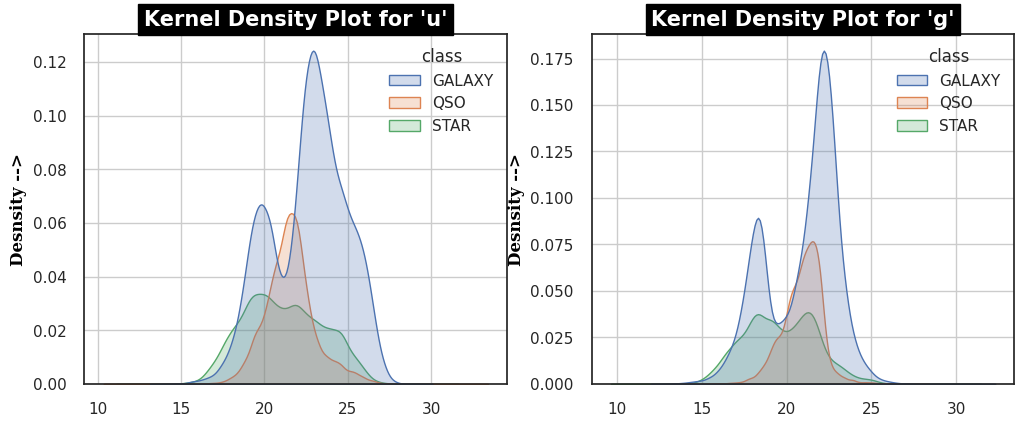

In [ ]:
## KERNEL DENSITY PLOTS
cols = ["u", "g"]

kde_plotter(df, features = cols, target = 'class')

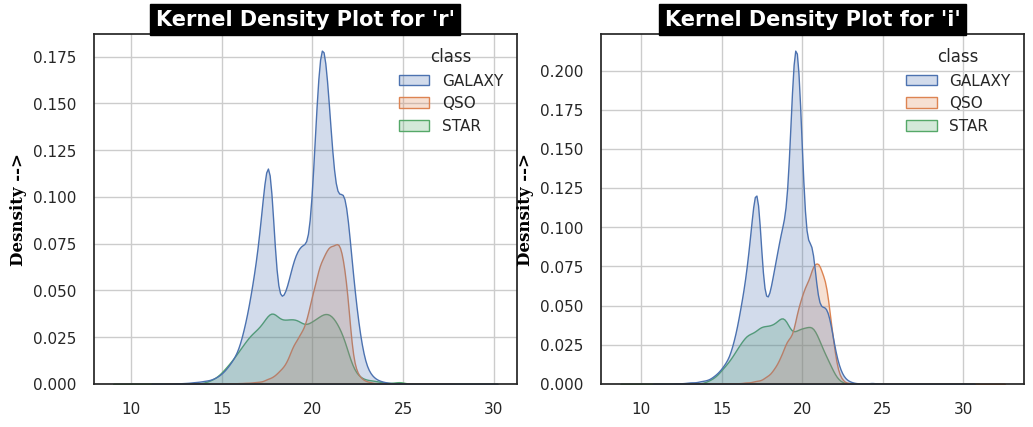

In [ ]:
## KERNEL DENSITY PLOTS
cols = ["r", "i"]

kde_plotter(df, features = cols, target = 'class')

<h1>~ <b>🪐 Treating Outliers</b> ~</h1>
<hr>

In [ ]:
X_pd = df.drop(columns = ['class'])
# float64 to float32 conversion for CUML
X_pd = X_pd.astype('float32')
y_pd = df['class']
cols = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']

In [ ]:
from scipy import stats

def detect_outliers_zscore(data, threshold = 3):
    z_scores = np.abs(stats.zscore(data))
    outliers = np.where(z_scores > threshold)
    return outliers[0]

def get_unique_outlier_indices(df, threshold=3):
    unique_outliers = set()

    for column in df.columns:
        data = df[column].values
        outliers = detect_outliers_zscore(data, threshold)
        unique_outliers.update(outliers)

    unique_outliers_list = list(unique_outliers)
    return unique_outliers_list

unique_outliers_indices = get_unique_outlier_indices(X_pd)
print("Unique Outlier Indices:", unique_outliers_indices)

Unique Outlier Indices: [81920, 32769, 8194, 32771, 40962, 73731, 98316, 73743, 49172, 81941, 98342, 49191, 81961, 41003, 8241, 8243, 65590, 41021, 16449, 24641, 49217, 24644, 73796, 98370, 24647, 73800, 73808, 41050, 16478, 32865, 82022, 73840, 98416, 115, 116, 41077, 49270, 57459, 24698, 90240, 90241, 32905, 49291, 82061, 24718, 90256, 98449, 57492, 90261, 73886, 82080, 161, 82081, 90275, 8359, 57512, 82087, 65707, 8363, 98484, 32953, 24767, 24775, 73937, 49363, 98516, 82135, 65754, 82141, 98526, 224, 49377, 57568, 57572, 98533, 57579, 238, 90351, 8435, 8436, 33018, 258, 65797, 98565, 16648, 41226, 49429, 24856, 82202, 90403, 82212, 16679, 296, 82222, 49461, 74037, 313, 24890, 8507, 33084, 33085, 24897, 74053, 82252, 90445, 33124, 33125, 98669, 65903, 57713, 82290, 8564, 74103, 41337, 24954, 33147, 65925, 74117, 49545, 57740, 82318, 16782, 57746, 41363, 41372, 49564, 74140, 82338, 57763, 74153, 41387, 25007, 41394, 33203, 90552, 90554, 25021, 49597, 57798, 82375, 457, 25035, 41422, 9

In [ ]:
X_pd.drop(unique_outliers_indices, inplace = True)

In [ ]:
def drop_values_by_indices(input_list, indices_to_drop):
    # Use list comprehension to create a new list excluding the specified indices
    return [value for i, value in enumerate(input_list) if i not in indices_to_drop]

y_pd = drop_values_by_indices(y_pd, unique_outliers_indices)

In [ ]:
# To split the data-set in '80-20' ratio
X_train, X_test, y_train, y_test = train_test_split(X_pd, y_pd, stratify = y_pd, test_size = 0.2, random_state = 42)

In [ ]:
scaling = StandardScaler()
X_train = scaling.fit_transform(X = X_train)
X_test = scaling.transform(X = X_test)

def make_dataframe(array, cols):
    df = pd.DataFrame(data = array, columns = cols)
    return df

X_train = make_dataframe(array = X_train, cols = cols)
X_test = make_dataframe(array = X_test, cols = cols)
class_labels = ["GALAXY", "STAR", "QSO"]

In [ ]:
from cuml.preprocessing import LabelEncoder as cu_LabelEncoder

# Necessary cudf conversions

## Conversion to cudf DataFrame
X_train_cu = cudf.DataFrame(X_train)
X_test_cu = cudf.DataFrame(X_test)
## Conversion to cudf Series
y_train_cu = cudf.Series(y_train)
y_test_cu = cudf.Series(y_test)

# Encoding and float32 conversion
X_train_cu_enc = cudf.get_dummies(X_train_cu).astype('float32')
## Encode the categorical target column (y_train_resampled_smt_cu) to numerical labels:
y_train_cu_enc = cu_LabelEncoder().fit_transform(y_train_cu)
y_test_cu_enc = cu_LabelEncoder().fit_transform(y_test_cu)

## Model 1: Evaluating with Decision Tree Default Parameters

In [ ]:
dt_classifier_0 = DecisionTreeClassifier(random_state=42, max_depth=8)
dt_classifier_0.fit(X_train, y_train)
y_pred_dt_0 = dt_classifier_0.predict(X_test)

# To print the classification report
print("Classification Report for decision tree:\n", classification_report(y_test, y_pred_dt_0))

Classification Report for decision tree:
               precision    recall  f1-score   support

      GALAXY       0.97      0.98      0.98     11844
         QSO       0.94      0.91      0.92      3421
        STAR       1.00      0.99      0.99      4300

    accuracy                           0.97     19565
   macro avg       0.97      0.96      0.97     19565
weighted avg       0.97      0.97      0.97     19565



In [ ]:
test_accuracy_dt_0 = (y_pred_dt_0 == y_test).mean()
print("Test Set Accuracy of Decision Tree Classifier base model:", test_accuracy_dt_0)

Test Set Accuracy of Decision Tree Classifier base model: 0.9715819064656274


## Model 2: Evaluating with Random Forest Classifier Default Parameters

In [ ]:
# Define base model
rf_classifier = cu_RFC()

In [ ]:
## Create a RandomForestClassifier object:
rf_0 = rf_classifier.fit(cudf.DataFrame.to_cupy(X_train_cu), cupy.asnumpy(y_train_cu_enc))

## Prediction
y_pred_rf_0 = rf_0.predict(X_test)

# To print the classification report
print("Classification Report for RandomForest Classifier:\n", classification_report(y_test_cu_enc.to_numpy(), y_pred_rf_0.to_numpy()))

Classification Report for RandomForest Classifier:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     11844
           1       0.95      0.92      0.93      3421
           2       0.98      0.99      0.98      4300

    accuracy                           0.97     19565
   macro avg       0.97      0.96      0.96     19565
weighted avg       0.97      0.97      0.97     19565



In [ ]:
# Test Accuracy
test_accuracy_rf_0 = (y_pred_rf_0.to_numpy() == y_test_cu_enc.to_numpy()).mean()
print("Test Set Accuracy of Random Forest Classifier:", test_accuracy_rf_0)

Test Set Accuracy of Random Forest Classifier: 0.9705596728852542


## Model 3: Evaluating with XGBoost classifier with Default Parameters

In [ ]:
## Create train and test dmatrix for XGBoost
dtrain_xgb_0 = xgb.DMatrix(
        pd.get_dummies(X_train),
        LabelEncoder().fit_transform(y_train))

dtest_xgb_0 = xgb.DMatrix(
        pd.get_dummies(X_test),
        LabelEncoder().fit_transform(y_test))

In [ ]:
## Model fit
xgb_mod_0 = xgb.train(
                        {
                          'objective': 'multi:softmax',  # Multiclass classification objective
                          'num_class': 3,                # Specify the number of classes (here, 3)
                          'eval_metric': 'mlogloss',     # Optional: specify an evaluation metric
                          'tree_method': 'hist',
                        },
                        dtrain_xgb_0,
                        num_boost_round=100, evals=[(dtrain_xgb_0, 'train')])

[0]	train-mlogloss:0.73359
[1]	train-mlogloss:0.52519
[2]	train-mlogloss:0.39170
[3]	train-mlogloss:0.30251
[4]	train-mlogloss:0.23989
[5]	train-mlogloss:0.19540
[6]	train-mlogloss:0.16329
[7]	train-mlogloss:0.13958
[8]	train-mlogloss:0.12239
[9]	train-mlogloss:0.10961
[10]	train-mlogloss:0.10021
[11]	train-mlogloss:0.09319
[12]	train-mlogloss:0.08800
[13]	train-mlogloss:0.08378
[14]	train-mlogloss:0.08076
[15]	train-mlogloss:0.07836
[16]	train-mlogloss:0.07640
[17]	train-mlogloss:0.07478
[18]	train-mlogloss:0.07328
[19]	train-mlogloss:0.07180
[20]	train-mlogloss:0.07076
[21]	train-mlogloss:0.06955
[22]	train-mlogloss:0.06857
[23]	train-mlogloss:0.06796
[24]	train-mlogloss:0.06725
[25]	train-mlogloss:0.06656
[26]	train-mlogloss:0.06555
[27]	train-mlogloss:0.06476
[28]	train-mlogloss:0.06401
[29]	train-mlogloss:0.06326
[30]	train-mlogloss:0.06279
[31]	train-mlogloss:0.06242
[32]	train-mlogloss:0.06183
[33]	train-mlogloss:0.06124
[34]	train-mlogloss:0.06085
[35]	train-mlogloss:0.06046
[3

In [ ]:
## Prediction
pred_xgb_0 = xgb_mod_0.predict(dtest_xgb_0)

In [ ]:
# To print the classification report
print("Classification Report for XGB classifier:\n", classification_report(LabelEncoder().fit_transform(y_test), pred_xgb_0))

Classification Report for XGB classifier:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     11844
           1       0.95      0.92      0.94      3421
           2       0.99      0.99      0.99      4300

    accuracy                           0.98     19565
   macro avg       0.97      0.97      0.97     19565
weighted avg       0.97      0.98      0.97     19565



In [ ]:
# Test Accuracy
test_accuracy_xgb_0 = (LabelEncoder().fit_transform(y_test) == pred_xgb_0).mean()
print("Test Set Accuracy of XgBoost Classifier:", test_accuracy_xgb_0)

Test Set Accuracy of XgBoost Classifier: 0.9751086123179147


## Model 4: Evaluating with Support Vector Machine with Default Parameters

In [ ]:
# Base model
svc = cu_SVC(multiclass_strategy = 'ovr')

In [ ]:
# Fit model
svc_mod_0 = svc.fit(cudf.DataFrame.to_cupy(X_train_cu), cupy.asnumpy(y_train_cu_enc))

In [ ]:
# Prediction
y_pred_svc_0 = svc_mod_0.predict(X_test_cu)

In [ ]:
# To print the classification report
print("Classification Report for SVC:\n", classification_report(y_test_cu_enc.to_numpy(), y_pred_svc_0.to_numpy()))

Classification Report for SVC:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97     11844
           1       0.96      0.90      0.93      3421
           2       0.93      0.99      0.96      4300

    accuracy                           0.96     19565
   macro avg       0.95      0.95      0.95     19565
weighted avg       0.96      0.96      0.96     19565



In [ ]:
# Test Accuracy
test_accuracy_svc_0 = (y_pred_svc_0.to_numpy() == y_test_cu_enc.to_numpy()).mean()
print("Test Set Accuracy of SVC:", test_accuracy_svc_0)

Test Set Accuracy of SVC: 0.9586506516739075


# Hyperparameter Tuning

## Decision Tree Classifier

In [ ]:
# Post Pruning - Cost Complexity
dt1 = tree.DecisionTreeClassifier(random_state=42, max_depth=8)
path = dt1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Get 20 evenly spread ccp_alphas
size = 40
numElems = len(ccp_alphas) if len(ccp_alphas) < size else size
idx = np.round(np.linspace(0, len(ccp_alphas) - 1, numElems)).astype(int)
ccp_alphas = [ccp_alphas[i] for i in idx]

clfs = []
tick = time.perf_counter()
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=8, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

tock = time.perf_counter()
print(f"Finished model training in {round(tock - tick, 2)} second(s).")
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

alph_1 = ccp_alphas[np.argmax(test_scores, axis=0)]
print(f"Best alpha: {alph_1}.")

Finished model training in 46.92 second(s).
Best alpha: 0.0.


In [ ]:
dt2 = tree.DecisionTreeClassifier(random_state=42, max_depth=8, ccp_alpha=alph_1)

dt2.fit(X_train, y_train)

y_pred_dt_2 = dt2.predict(X_test)

In [ ]:
test_accuracy_dt_2 = (y_pred_dt_2 == y_test).mean()
print("Test Set Accuracy for Decision Tree Classifier (HyperParameter Tuned):", test_accuracy_dt_2)

# To print the classification report
print("Classification Report for Decision Tree Classifier:\n", classification_report(y_test, y_pred_dt_2))

Test Set Accuracy for Decision Tree Classifier (HyperParameter Tuned): 0.9715819064656274
Classification Report for Decision Tree Classifier:
               precision    recall  f1-score   support

      GALAXY       0.97      0.98      0.98     11844
         QSO       0.94      0.91      0.92      3421
        STAR       1.00      0.99      0.99      4300

    accuracy                           0.97     19565
   macro avg       0.97      0.96      0.97     19565
weighted avg       0.97      0.97      0.97     19565



## Randomforest Classifier

In [ ]:
params_dist_rf = {
		'max_features': ['sqrt', 'log2'],
	  'max_samples': np.array([0.25, 0.5, 0.75, 1.]).astype('float32'),
	  'n_bins': [16, 32, 64, 128, 256],
	  'min_samples_split': np.array([2, 3, 4, 5]).astype('float32')
}

In [ ]:
grid_search_rf = cu_GridSearchCV(rf_classifier, params_dist_rf, cv=5, scoring='accuracy')
tick = time.perf_counter()
grid_search_rf.fit(cudf.DataFrame.to_cupy(X_train_cu_enc), cupy.asnumpy(y_train_cu_enc))
tock = time.perf_counter()
print(f"Finished model training in {round(tock - tick, 2)} second(s).")

Finished model training in 569.44 second(s).


In [ ]:
best_params_rf = grid_search_rf.best_params_
print(best_params_rf)

{'max_features': 'sqrt', 'max_samples': 0.25, 'min_samples_split': 2.0, 'n_bins': 16}


In [ ]:
y_pred_rf = grid_search_rf.predict(X_test_cu)
test_accuracy_rf = (y_pred_rf.to_numpy() == y_test_cu_enc.to_numpy()).mean()
print("Test Set Accuracy for Random Forest Classifier:", test_accuracy_rf)

Test Set Accuracy for Random Forest Classifier: 0.9590595451060567


In [ ]:
rf_0.get_params()

{'handle': <pylibraft.common.handle.Handle at 0x7d42fe02a3a0>,
 'verbose': 4,
 'output_type': 'input',
 'n_estimators': 100,
 'max_depth': 16,
 'max_features': 'auto',
 'n_bins': 128,
 'split_criterion': 0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_impurity_decrease': 0.0,
 'bootstrap': True,
 'max_samples': 1.0,
 'max_leaves': -1,
 'accuracy_metric': None,
 'max_batch_size': 4096,
 'n_streams': 4,
 'dtype': dtype('float32'),
 'min_weight_fraction_leaf': None,
 'n_jobs': None,
 'max_leaf_nodes': None,
 'min_impurity_split': None,
 'oob_score': None,
 'random_state': None,
 'warm_start': None,
 'class_weight': None,
 'criterion': None}

In [ ]:
grid_search_rf.best_estimator_.get_params()

{'handle': <pylibraft.common.handle.Handle at 0x7d42fd010ba0>,
 'verbose': 4,
 'output_type': 'input',
 'n_estimators': 100,
 'max_depth': 16,
 'max_features': 'sqrt',
 'n_bins': 16,
 'split_criterion': 0,
 'min_samples_leaf': 1,
 'min_samples_split': 2.0,
 'min_impurity_decrease': 0.0,
 'bootstrap': True,
 'max_samples': 0.25,
 'max_leaves': -1,
 'accuracy_metric': None,
 'max_batch_size': 4096,
 'n_streams': 4,
 'dtype': dtype('float32'),
 'min_weight_fraction_leaf': None,
 'n_jobs': None,
 'max_leaf_nodes': None,
 'min_impurity_split': None,
 'oob_score': None,
 'random_state': None,
 'warm_start': None,
 'class_weight': None,
 'criterion': None}

In [ ]:
# Reset GPU ram
#from numba import cuda
#cuda.get_current_device().reset()

## XGBoost Classifier

## Support Vector Machine

In [ ]:
params_dist_svm = {
		'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

In [ ]:
grid_search_svm = cu_GridSearchCV(svc, params_dist_svm, cv=5, scoring='accuracy')
tick = time.perf_counter()
grid_search_svm.fit(cudf.DataFrame.to_cupy(X_train_cu_enc), cupy.asnumpy(y_train_cu_enc))
tock = time.perf_counter()
print(f"Finished model training in {round(tock - tick, 2)} second(s).")

[W] [15:28:27.443614] SVC with the linear kernel can be much faster using the specialized solver provided by LinearSVC. Consider switching to LinearSVC if tranining takes too long.
Finished model training in 86.58 second(s).


In [ ]:
best_params_svm = grid_search_svm.best_params_
print(best_params_svm)

{'kernel': 'linear'}


In [ ]:
grid_search_svm.best_estimator_.get_params()

{'handle': <pylibraft.common.handle.Handle at 0x7d430421e4c0>,
 'verbose': 4,
 'output_type': 'input',
 'C': 1,
 'kernel': 'linear',
 'degree': 3,
 'gamma': 'scale',
 'coef0': 0.0,
 'tol': 0.001,
 'cache_size': 1024.0,
 'max_iter': -1,
 'nochange_steps': 1000,
 'probability': False,
 'random_state': None,
 'class_weight': None,
 'multiclass_strategy': 'ovr'}

In [ ]:
y_pred_svm = grid_search_svm.predict(X_test_cu)
test_accuracy_svm = (y_pred_rf.to_numpy() == y_test_cu_enc.to_numpy()).mean()
print("Test Set Accuracy for Random Forest Classifier:", test_accuracy_svm)

Test Set Accuracy for Random Forest Classifier: 0.9590595451060567
